# Assignment 3 - Clustering Data 
In this assignment, your task is to find a dataset and see if you can identify and describe some meaningful clusters within it.

1. Find a dataset.

The dataset i have chosen: https://www.kaggle.com/kandij/mall-customers
The dataset contains some basic data about the customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [27]:
pip install --upgrade pip sklearn

  Using cached pip-22.0.3-py3-none-any.whl (2.1 MB)
Requirement already up-to-date: sklearn in c:\users\crys\anaconda3\lib\site-packages (0.0)
  Attempting uninstall: pip
    Found existing installation: pip 20.2
    Uninstalling pip-20.2:
      Successfully uninstalled pip-20.2
Note: you may need to restart the kernel to use updated packages.


In [21]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [22]:
#https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
#https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data
df.Age.value_counts()

32    11
35     9
31     8
19     8
30     7
49     7
40     6
38     6
36     6
47     6
23     6
27     6
20     5
48     5
21     5
34     5
50     5
29     5
28     4
24     4
54     4
67     4
59     4
18     4
68     3
60     3
46     3
43     3
45     3
22     3
25     3
39     3
37     3
33     3
58     2
66     2
65     2
63     2
26     2
57     2
44     2
53     2
52     2
51     2
41     2
42     2
70     2
56     1
55     1
64     1
69     1
Name: Age, dtype: int64

In [24]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [25]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.00,-0.03,0.98,0.01
Age,-0.03,1.00,-0.01,-0.33
Annual Income (k$),0.98,-0.01,1.00,0.01
Spending Score (1-100),0.01,-0.33,0.01,1.00


## Clustering

Standardise

First we have to standardise the range of the dataset, as PCA and K-Means are effected by scale.

In [40]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
#I have dropped the gender column because it had no numerical value
x = df
x = x.drop("Gender", axis = 1)

In [41]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
#Standardise
x = StandardScaler().fit_transform(x)

# Plot in 2D
Now we can use PCA to reduce the dataset to only 2 dimensions. This means we can plot it on a 2D axis.

In [42]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
# now let's instantiate a PCA object so we can do some dimensionality reduction and account for multicollinearity
pca = PCA(n_components=2)
x_train = pca.fit_transform(x)

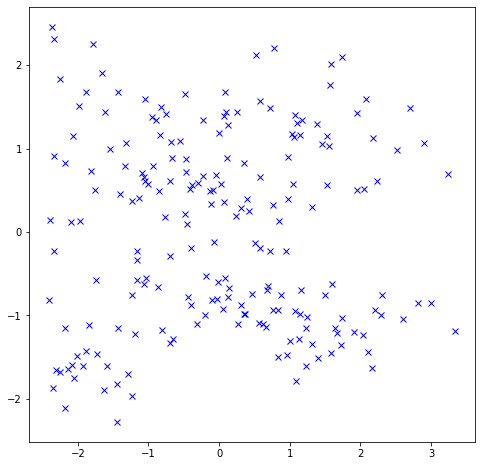

In [43]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_train[:,0],x_train[:,1],"bx")

2. Pick some variables and visualise as a 2D plot using PCA. Does there appear to be clear groups?

After reducing the dimensions to 2 and visualizing the dataset, it does not appear to be clear groups.


Explanation: There may be no clear groups to define clustering groups because PCA is a dimensionality reduction technique. It reduces the number of dimensions in a dataset while preserving the most critical information. This means that PCA may not always produce clear groups since the most important information may not be the information used to define the groups.

Ref: 9 Best Machine Learning Models for Beginners. https://www.linkedin.com/pulse/9-best-machine-learning-models-beginners-arif-alam-


Explanation: https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca

# Elbow Plot
Whats the best value of k? We can look for the elbow that shows a big jump in inertia before a flattening off. Here we plot the first 20 values of k.

Remember, this is just a guide to help you pick a value of k and other factors may be involved in your final decision

C:\Users\Crys\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


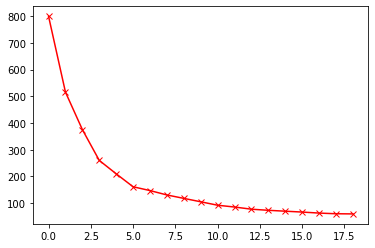

In [44]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
#https://stackoverflow.com/questions/66681127/attributeerror-kmeans-object-has-no-attribute-inertia
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

Elbow point =  k would be 5

The elbow plot looks like an arm, and it is at the elbow(Where the line bends); we see the numerical suggestion for the amount of cluster you can assign to k.
We see the bend/elbow at five in our case, meaning this is the optimal numerical assignment we can give to k.

Explanation: The elbow method uses the sum of squares at each number of clusters that can be calculated and visualised, and the user looks for a slope change from steep to shallow (the elbow) to determine the number of clusters they can assign to k.

Ref: GitHub - BalmukundMistry/Determining-clusters: Determine .... https://github.com/BalmukundMistry/Determining-clusters

Ref: 10 Tips for Choosing the Optimal Number of Clusters | by .... https://towardsdatascience.com/10-tips-for-choosing-the-optimal-number-of-clusters-277e93d72d92

Ref: Using the elbow method to determine the optimal number of clusters for k-means clustering https://bl.ocks.org/rpgove/0060ff3b656618e9136b

In [45]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

3. Run K-Means and visualise the results. Experiment with some of the things below. It may be that you iterate between this and step 4 a few times, investigating how your clusters are and updating your parameters / dataset.

    * Different values of k
    
    * Different features (e.g. different columns in your dataset)

    * Different dimensionality reductions (e.g run PCA first, then cluster the principal components as opposed to the original features)
    

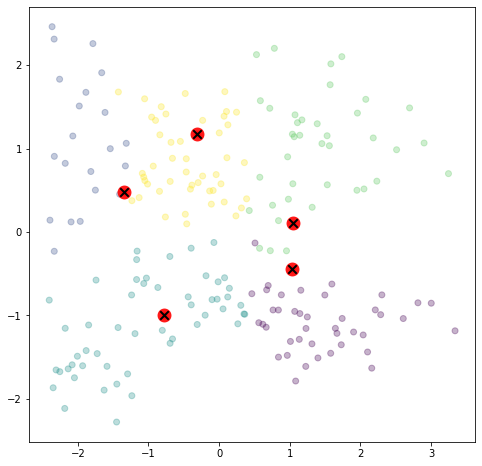

In [60]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

Dimensionality reduction set to 2:

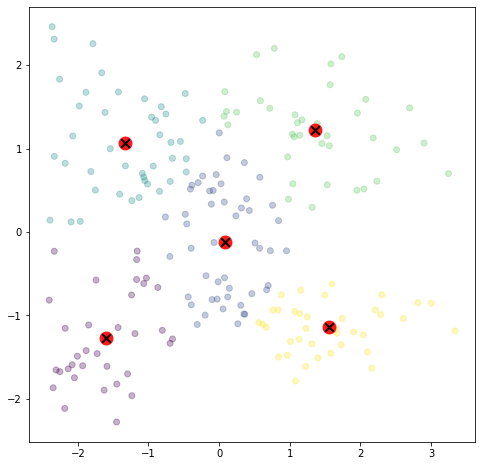

In [65]:
##https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
#How many dimensions to reduce to (before clustering)?
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

Which provides the best clusters? How did you reach this conclusion?

The best clusters were provided by selecting the best value for k after plotting using the elbow method and applying PCA before clustering.

The clusters were provided using k as five and using the features: Age, Annual Income (k$), Spending Score (1-100), and a dimensionality reduction set to 2. 

According to the 2D graph, the data was clustered into five groups, but the centroids did not assign correctly.

First, we have applied k as 5 using the elbow method and applied the PCA after clustering, but it did not give expected results. Then applied k as five and applied PCA before clustering. This allowed the clusters to be separated clearly, and centroids were assigned correctly.



Explanation: Why you should run PCA before clustering:
By doing PCA you are retaining all the important information. If your data exhibits clustering, this will be generally revealed after your PCA analysis: by retaining only the components with the highest variance, the clusters will be likely more visibile (as they are most spread out).


Ref: https://stats.stackexchange.com/questions/235946/pca-before-cluster-analysis#:~:text=By%20doing%20PCA%20you%20are,they%20are%20most%20spread%20out).


Ref: https://www.researchgate.net/post/Which-would-you-use-first-K-Means-Clustering-or-Principal-Component-Analysis

Ref: https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

Ref:
https://www.kdnuggets.com/2020/06/centroid-initialization-k-means-clustering.html

4. Investigate the examples in your clusters, do they seem to have coherent differences? If so, can you characterise them? 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

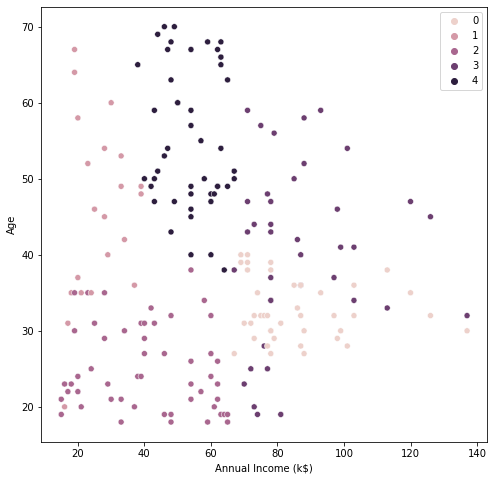

In [59]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Age", hue=kmeans.labels_)

# The Sum of Squares Method

Another clustering validation method would be to choose the optimal number of a cluster by minimizing the within-cluster sum of squares (a measure of how tight each cluster is) and maximizing the between-cluster sum of squares (a measure of how separated each cluster is from the others).

Text(0.5, 0, 'Clusters')

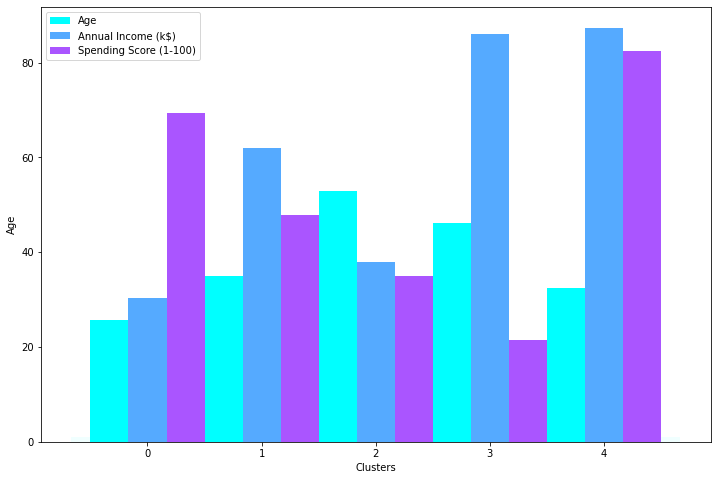

In [69]:
#https://git.arts.ac.uk/lmccallum/Intro-to-DS-2022/blob/master/Week%206/Intro%20to%20Data%20Science%20Assignment%203%20-%20Clustering_Data.ipynb
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
df["cluster"] = labels

#Pick some features to plot
features =  ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
width = 1/(len(features))

fig,ax = plt.subplots(figsize=(12, 8))

for i in range(k):
    ax.bar([i],[1],width=width*4,color = "azure" if i%2==0 else "whitesmoke")

cmap = plt.cm.get_cmap('cool')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    ax.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
ax.legend()
ax.set_ylabel("Age")
ax.set_xlabel("Clusters")

Cluster 0 - The cluster indicates consumers with low annual income but high spending scores. They are the people who are in their mid-20s. These people love to buy products or services more, even though they have low salaries.

Cluster 1 - The cluster indicates consumers in their 30s earning more than average annual income and spending more than average spending score.

Cluster 2 - The cluster indicates consumers with average annual income and average spending scores. Moreover, they are in their 50s. Even though these customers will not still be the prime target, the mall does not want to lose these customers.

Cluster 3 -  The cluster indicates consumers with high annual income but low spending scores. They are between the age of 40s-50s. Even though they earn high salaries, they may be not satisfied with the mall's products or services. This cluster of customers can be the target consumers of the mall as they have the potential to spend money.

Cluster 4 - The cluster indicates that consumers in their 30s have high annual income and high spending scores. These consumers are the primary source of profit for the mall. 